---
title: "Clustering"
execute:
  echo: false
format:
  html:
    page-layout: full
    code-tools: false
---

# Introduction

In this homework, we are focusing on performing clustering analysis on a dataset that tracks changes in uninsured rates across different regions or groups from 2010 to 2015. The dataset features two main columns: 'Uninsured Rate (2010)' and 'Uninsured Rate (2015)', which represent the proportion of the uninsured population at these two different points in time. This data provides a valuable opportunity to observe shifts in insurance coverage over a five-year period.

The primary objective of our clustering analysis is to identify patterns and groupings within the data that can reveal underlying trends in insurance coverage changes. By applying k-means, DBSCAN, and Hierarchical clustering methods, we aim to uncover distinct clusters that can help us understand how and where significant shifts in uninsured rates have occurred. For instance, through this analysis, we might be able to pinpoint regions or groups that have seen substantial improvements in coverage, as well as those where coverage has perhaps declined or not improved significantly. This information is crucial for policy analysis, allowing us to target areas that may need more attention or to understand the impacts of healthcare policies over this period.

## Theory

**K-Means Clustering:**
K-Means clustering is a widely used technique that groups data into a predetermined number of clusters, much like sorting different fruits into set baskets based on their attributes. In this method, each data point is assigned to the closest of the 'k' cluster centers. These centers, initially selected at random, are adjusted iteratively to minimize the distance between them and their associated data points, akin to finding the optimal central location for each cluster. The process is repeated until these centers stabilize, signifying well-defined, compact clusters.

To determine the optimal number of clusters, the 'Elbow Method' is often employed. This involves applying K-Means with various 'k' values and plotting the total within-cluster variance against the number of clusters. The 'elbow' point in the graph, where the rate of variance decrease changes markedly, is considered an appropriate estimate for the number of clusters.


**Hierarchical Clustering:**
Hierarchical clustering constructs a cluster hierarchy or tree. It can be envisioned as assembling a family tree, where each data point starts as an individual cluster, and pairs of clusters are progressively merged. There are two types: 'Agglomerative', which begins with each point as a separate cluster and combines them, and 'Divisive', which starts with a single cluster and divides it. The common approach is agglomerative, where the nearest clusters are merged at each step, creating a dendrogram that illustrates the clusters' arrangement.

The number of clusters is determined by cutting the dendrogram at a level that segregates the data suitably. Identifying 'large jumps' in the dendrogram can indicate natural divisions between clusters. 


**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
DBSCAN stands out from K-Means by not predetermining the number of clusters. Instead, it identifies clusters as areas of high density separated by areas of low density. Comparable to identifying a flock of birds where those flying closely are grouped together, and solitary ones are marked as outliers.

This method requires two parameters: 'epsilon', determining the proximity needed for points to be part of the same cluster, and 'min_samples', defining the minimum number of points required to form a dense region. DBSCAN excels in identifying clusters of irregular shapes and adapts to the data's structure, unlike K-Means, which presumes spherical clusters.






These clustering methods are essential for uncovering patterns in data, aiding in the comprehension of complex datasets and facilitating informed decision-making based on these analyses.


## Clustering Search Words

To effectively cluster textual data(in this case we are using record data but for future reference), several essential preprocessing steps are necessary to refine the data. This involves eliminating stop words, stripping out non-alphabetic characters including punctuation, and applying lemmatization where appropriate. These steps have been thoroughly covered in the Data Cleaning section for those interested in a detailed guide. Once the text data is preprocessed, it's ready for visualization.

In an optimal scenario, clustering this text data would result in four clear categories: aca, medicine, and medicaid. The objective is to have each cluster distinctly associated with one of these categories. This classification will then provide deeper insights into the varied impacts of each of these medical impacts in U.S.

https://newsapi.org/v2/everything
topic =  ACA in ACA
TITLES= ['Dr. Y. S. Rajashekar Reddy ACA–VDCA Cricket Stadium', 'Assam Cricket Association Stadium, Guwahati', '2022 ACA Africa T20 Cup']
-------------------------
Dr. Y. S. Rajashekar Reddy ACA–VDCA Cricket Stadium
https://en.wikipedia.org/wiki/Dr._Y._S._Rajashekar_Reddy_ACA%E2%80%93VDCA_Cricket_Stadium
['Ground profile', 'History', 'Stats & records', 'List of centuries', 'Key', 'Tests', 'ODIs', 'List of five wicket hauls', 'Key', 'Tests', 'One Day Internationals', 'Notable events', 'Gallery', 'References', 'External links']
-------------------------
Assam Cricket Association Stadium, Guwahati
https://en.wikipedia.org/wiki/Assam_Cricket_Association_Stadium,_Guwahati
['History', 'List of centuries', 'Key', 'One day internationals', 'T20 internationals', 'See also', 'References', 'External links']
-------------------------
2022 ACA Africa T20 Cup
https://en.wikipedia.org/wiki/2022_ACA_Africa_T20_Cup
['North-Western qualifier', 'Point

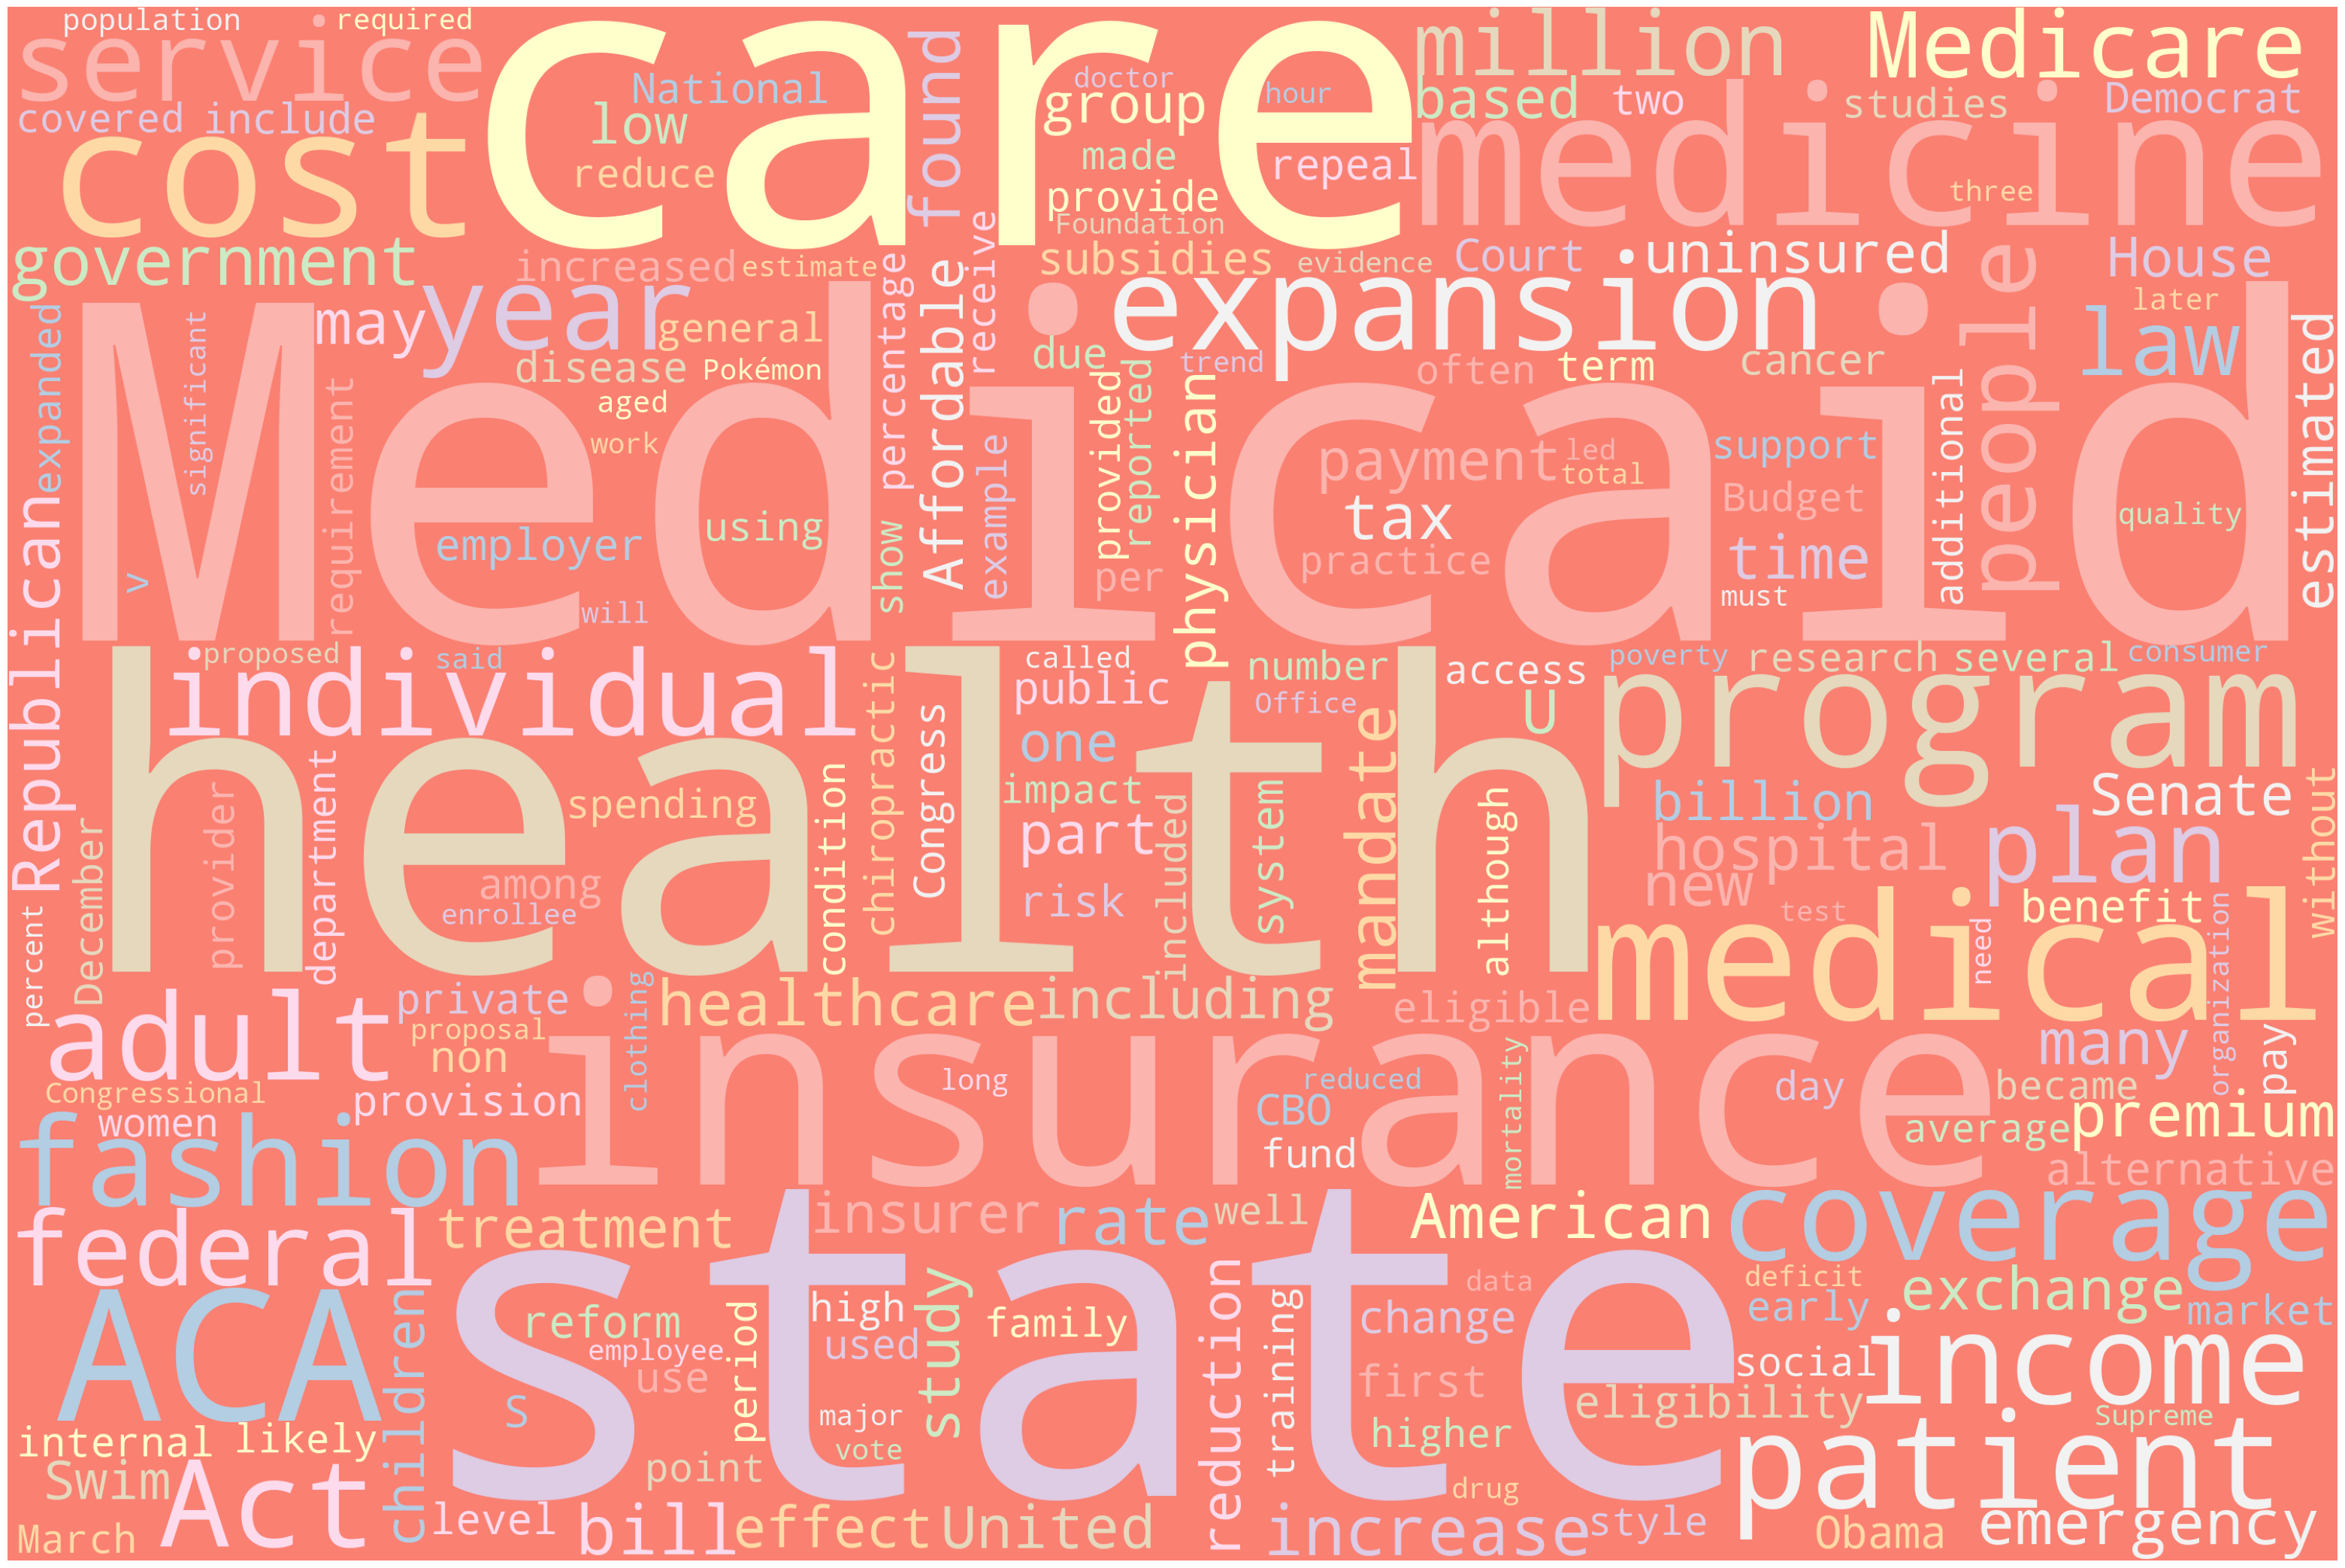

topic =  ACA in Medicine
TITLES= ['Dr. Y. S. Rajashekar Reddy ACA–VDCA Cricket Stadium', 'Emergency medicine', 'Affordable Care Act']
-------------------------
Dr. Y. S. Rajashekar Reddy ACA–VDCA Cricket Stadium
https://en.wikipedia.org/wiki/Dr._Y._S._Rajashekar_Reddy_ACA%E2%80%93VDCA_Cricket_Stadium
['Ground profile', 'History', 'Stats & records', 'List of centuries', 'Key', 'Tests', 'ODIs', 'List of five wicket hauls', 'Key', 'Tests', 'One Day Internationals', 'Notable events', 'Gallery', 'References', 'External links']
-------------------------
Emergency medicine
https://en.wikipedia.org/wiki/Emergency_medicine
['Scope', 'Work patterns', 'History', 'Financing and practice organization', 'Reimbursement', 'Compensation', 'Payment systems', 'Overutilization', 'Uncompensated care', 'EMTALA', 'Care delivery in different ED settings', 'Rural', 'Urban', 'Patient–provider relationships', 'Medical error', 'Treatments', 'Training', 'Argentina', 'Australia and New Zealand', 'Belgium', 'Brazil'

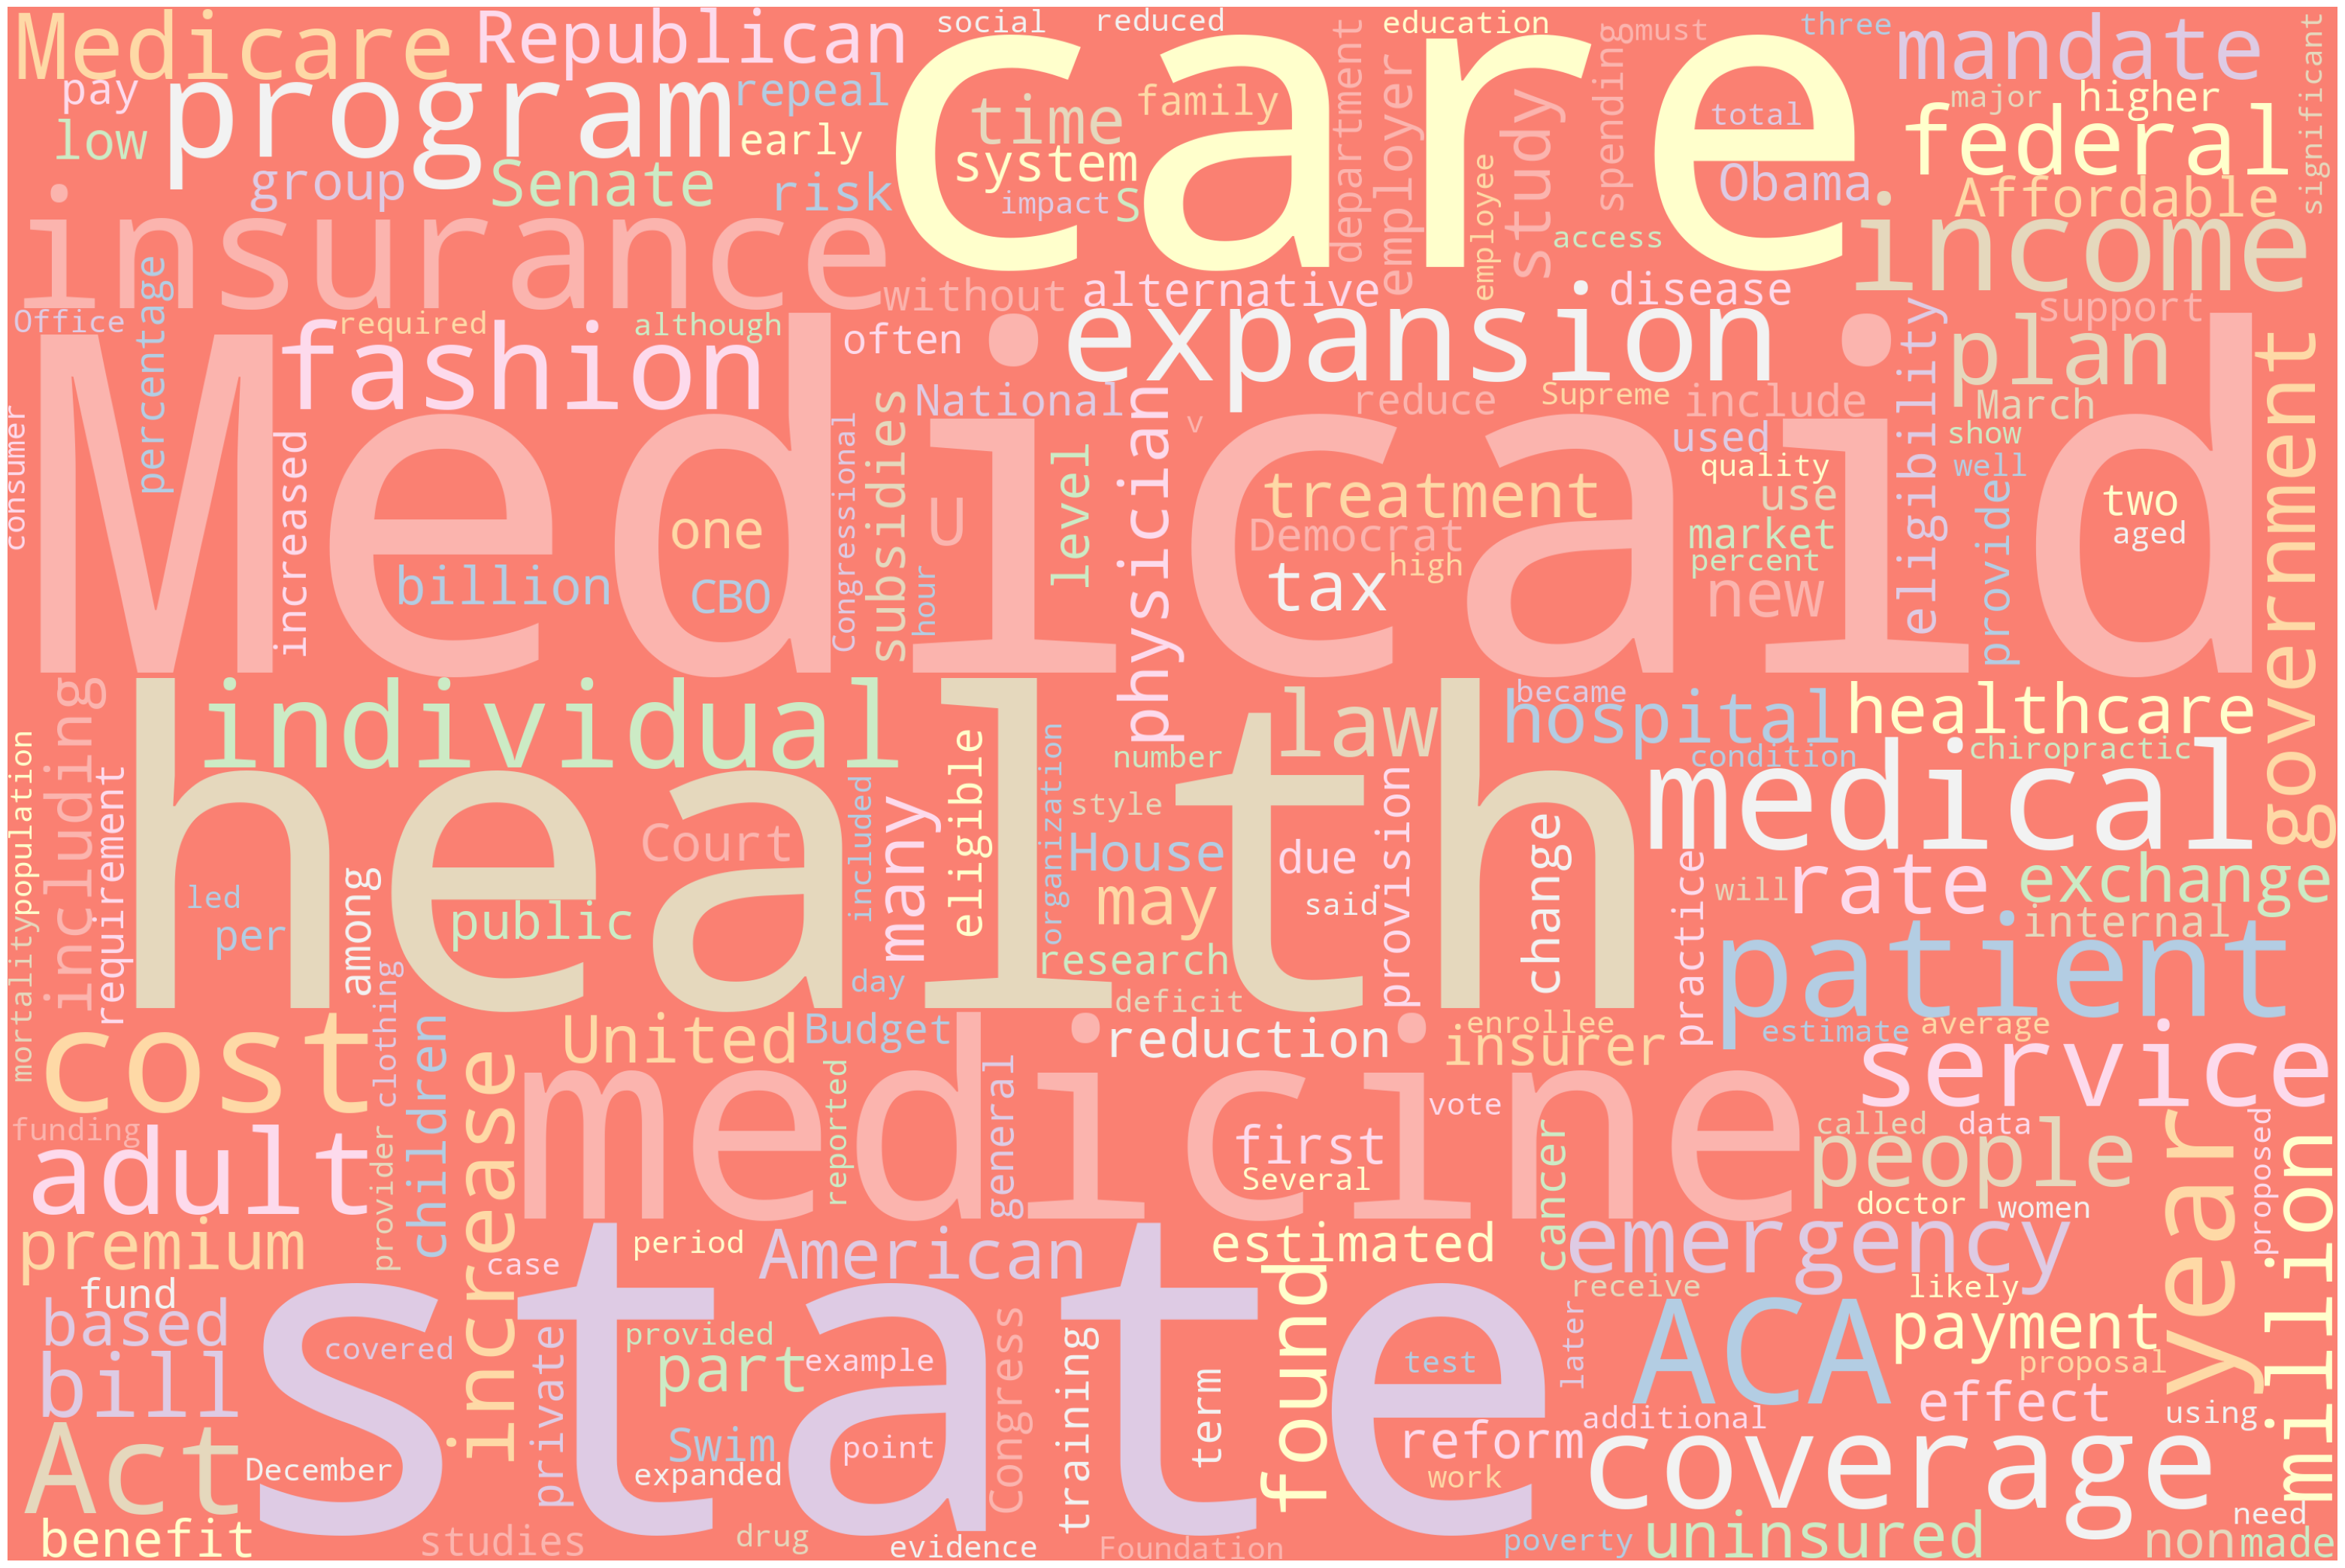

topic =  ACA in Medicaid
TITLES= ['Medicaid', 'Affordable Care Act', 'Medicaid coverage gap']
-------------------------
Medicaid
https://en.wikipedia.org/wiki/Medicaid
['Features', 'History', 'Expansion under the Affordable Care Act', 'State implementations', 'Differences by state', 'Political influences', 'Eligibility and coverage', 'Reimbursement for care providers', 'Enrollment', 'Comparisons with Medicare', 'Benefits', 'Dental', 'Eligibility', 'PPACA income test standardization', 'Non-PPACA eligibility', 'Supplemental Security Income beneficiaries', 'Five year "look-back"', 'Immigration status', 'Children and SCHIP', 'HIV', 'Utilization', 'Budget and financing', 'Effects', 'Coverage gains', 'Mortality and disability reduction', 'Rural hospitals boosted revenue', 'Financial and health security increase', 'Political participation increase', 'Crime reduction', 'Oregon Medicaid health experiment and controversy', 'See also', 'References', 'Further reading', 'External links']
----------

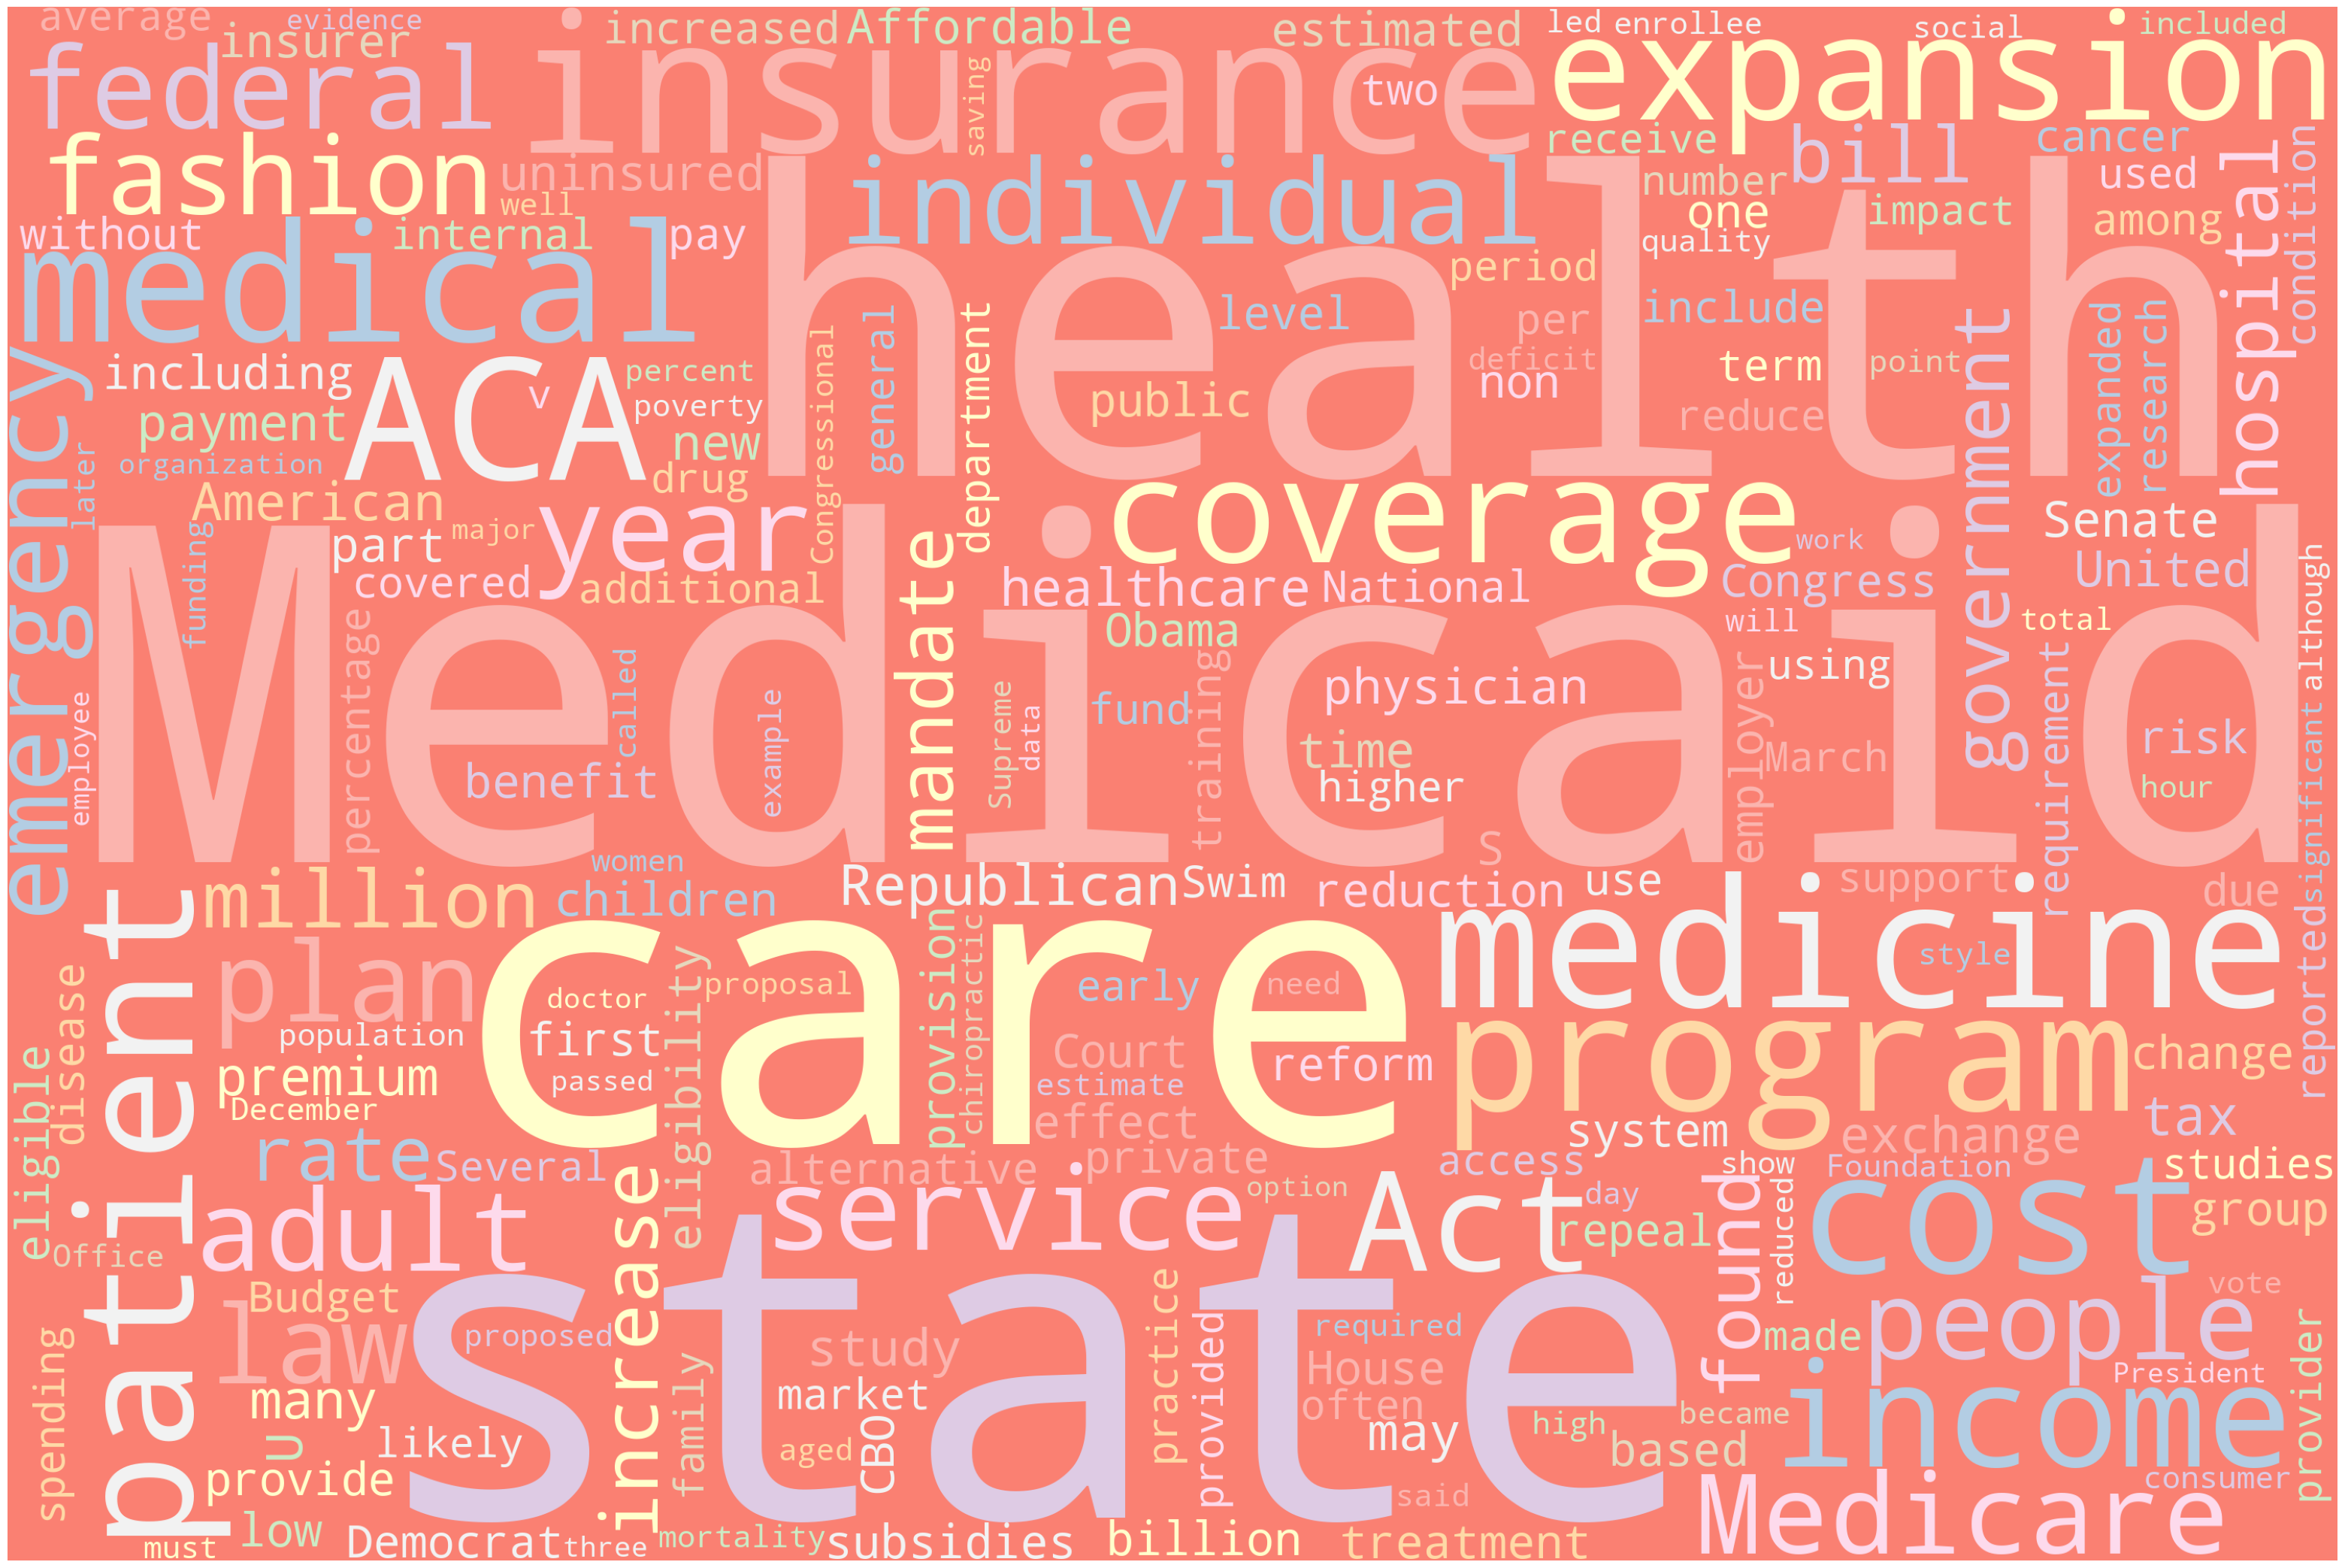

In [47]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

API_KEY="695bba0b702f4443ac5ee2022411804f"

baseURL = "https://newsapi.org/v2/everything"
total_requests=2
verbose=True

topics = ["ACA", "Medicine", "Medicaid"]
results = {}

print(baseURL)


for topic in topics:
    URLpost = {
        'apiKey' : API_KEY,
        'q' : topic,
        'sortBy': 'relevancy',
        'totalRequests': 1
    }
    response = requests.get(baseURL, URLpost)
    response = response.json()

    if response["status"] == "ok":
        # Extract title and description for each article
        articles = response["articles"]
        text_data = [{"title": article["title"], "description": article["description"]} for article in articles]
        results[topic] = text_data

#demo codes for clean string
def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        out = re.sub('[’.]+', '', input_string)

        out = re.sub(r'\s+', ' ', out)

        out=out.lower()
    except:
        print("ERROR for clean string")
        out=''
    return out

for topic, articles in results.items():
    for article in articles:
        article["title"] = string_cleaner(article["title"])
        article["description"] = string_cleaner(article["description"])

def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    
    def plot_cloud(wordcloud):
        plt.figure(figsize=(40, 30))
        plt.imshow(wordcloud) 
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()




import wikipedia

num_topics = 3

topics_3 = ["ACA", "Medicine", "Medicaid"]

#using demo code for reference
def print_info(wiki_page):
    print("-------------------------")
    print(wiki_page.title)
    print(wiki_page.url)
    print(wiki_page.sections)

    if(verbose):
        print(wiki_page.sections)
        print(wiki_page.categories)
        print(wiki_page.html)
        print(wiki_page.images)
        print(wiki_page.content)
        print(wikipedia.summary(wiki_page.title, auto_suggest=False))
        print(wiki_page.references)
        print(wiki_page.links[0],len(page.links))


#using demo again but changing topics and play with it
for i in topics_3:
    topic_list=["ACA", "Medicine Price", "Medicaid USA" ]
    for topic in topic_list:
        topic=topic+' in '+ i 
        print("topic = ",topic)
        max_num_pages=3 
        verbose=False

        titles=wikipedia.search(topic,results=max_num_pages)
        print("TITLES=",titles)
        
        num_files=0
        for title in titles:
            try:
                page = wikipedia.page(title, auto_suggest=False)
                print_info(page)
                text = text + page.content
                num_files+=1
            except:
                print("SOMETHING WENT WRONG:", title);  

    generate_word_cloud(text)

As illustrated above, each word cloud showcases a unique vocabulary, suggesting the potential for clustering the data based on these linguistic variations. To effectively use text data for clustering, it must initially undergo vectorization. Following this, the data is normalized and subsequently clustered utilizing three distinct methods: K-means, DBSCAN, and Hierarchical clustering.

## K-Means Clustering

When initially considering clustering for any dataset, the most common approach is K-Means clustering. This method clusters data into 'k' distinct groups using Lloyd's algorithm, which identifies centroids or central points of the dataset. It then groups the data around these centroids. The 'k' in K-Means represents the number of these centroids or centers around which the data is organized.


**The Elbow Method:**
The elbow method offers a straightforward way to assess the effectiveness of a chosen 'k' value for clustering. Utilizing metrics such as inertia or distortion, which both calculate the sum of squared Euclidean distances between each point in a cluster and its centroid, this method visually represents the efficiency of different 'k' values. In the graph produced by the elbow method, the point where the curve bends most significantly indicates the optimal 'k' value. For the record data in question, the elbow method revealed a pronounced bend at k=2, suggesting it as the ideal number of clusters.

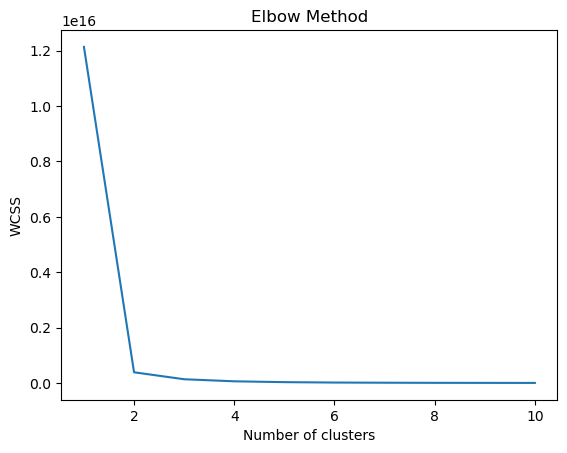

In [49]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv("cleaned_data/cleaned_states.csv")

df = pd.DataFrame(data)

first_column = df.columns[0]
df = df.drop(first_column, axis=1)

X = df.dropna()

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**K-Means Clustering Visualizations:**

To illustrate the results of K-means clustering, we begin by selecting the value of 'k'. Based on the elbow plot, I have chosen 'k' values of 2 and 3 for this analysis. Below, you can see the visual representation of the clustering outcomes for these selected 'k' values:

/Users/naomiyamaguchi/Library/r-miniconda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/cf/c1prx4vx7lz0h2p7zgncpmy00000gn/T/ipykernel_1880/1400740669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_


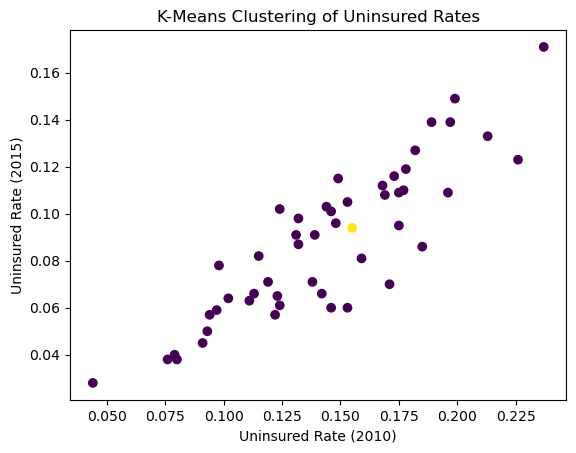

In [53]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(X)

X['Cluster'] = kmeans.labels_

plt.scatter(X['Uninsured Rate (2010)'], X['Uninsured Rate (2015)'], c=X['Cluster'])
plt.xlabel('Uninsured Rate (2010)')
plt.ylabel('Uninsured Rate (2015)')
plt.title('K-Means Clustering of Uninsured Rates')
plt.show()


/Users/naomiyamaguchi/Library/r-miniconda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/cf/c1prx4vx7lz0h2p7zgncpmy00000gn/T/ipykernel_1880/1106516911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_


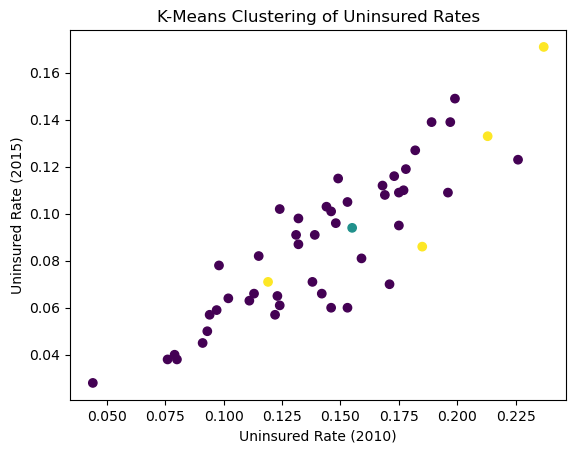

In [52]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(X)

X['Cluster'] = kmeans.labels_

plt.scatter(X['Uninsured Rate (2010)'], X['Uninsured Rate (2015)'], c=X['Cluster'])
plt.xlabel('Uninsured Rate (2010)')
plt.ylabel('Uninsured Rate (2015)')
plt.title('K-Means Clustering of Uninsured Rates')
plt.show()

Based on the analysis of visualizations and statistics, it appears that the optimal value of 'k' for our clustering analysis is 3. The plot distinctly displays three categories of uninsured rates, each represented by a different color, highlighting the impact of the Affordable Care Act (ACA) on these groupings.

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN) Clustering

Density-based clustering excels in grouping data that is closely packed, offering an effective solution where traditional clustering methods fall short. A quintessential example of density clustering can be visualized as below, showcasing two distinct clusters that conventional techniques might struggle to separate. This method's strength lies in its ability to identify and differentiate clusters that are densely grouped yet distinct from each other, a task that traditional clustering approaches often fail to accomplish effectively.

/var/folders/cf/c1prx4vx7lz0h2p7zgncpmy00000gn/T/ipykernel_1880/3970845994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = clusters


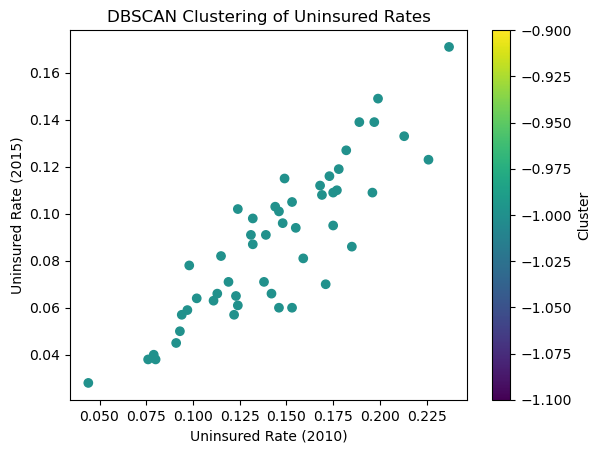

In [61]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=2)
clusters = dbscan.fit_predict(X)

X['Cluster'] = clusters

plt.scatter(X['Uninsured Rate (2010)'], X['Uninsured Rate (2015)'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Uninsured Rate (2010)')
plt.ylabel('Uninsured Rate (2015)')
plt.title('DBSCAN Clustering of Uninsured Rates')
plt.colorbar(label='Cluster')
plt.show()

Plot looks like most data points have been classified into one large cluster (indicated by the colors towards the top of the color bar), with a few points potentially classified as noise or smaller, separate clusters.

The plot shows a general trend where a decrease in the uninsured rate from 2010 to 2015 is visible, as the majority of points are below the line y = x, which would indicate no change. The plot does not show clearly distinct clusters, suggesting that the data may not have distinct groupings based on uninsured rates or that the parameters chosen for DBSCAN did not result in well-defined clusters.

## Hierarchical Clustering

Hierarchical clustering is another notable method that constructs cluster hierarchies in two ways: bottom-up (agglomerative) or top-down (divisive). This technique groups data points into clusters based on various distance calculation methods. Hierarchical clustering offers a valuable approach to determining the appropriate number of clusters. The selection of a distance metric influences the number of clusters formed, and users can evaluate their distinctiveness using a dendrogram - a tree-like diagram that visualizes the clustering process.

In our analysis, we will employ the bottom-up, or agglomerative, approach for building hierarchical clusters. This method starts by treating each data point as a separate cluster and progressively merges them based on their proximity, leading to a comprehensive hierarchy of clusters.

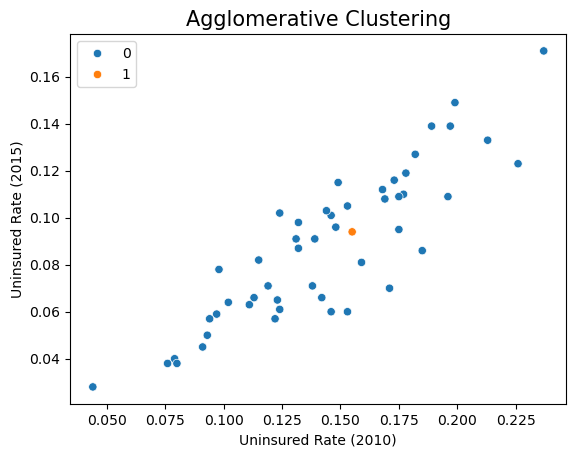

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Perform Agglomerative Clustering
alf = AgglomerativeClustering(linkage = "ward").fit(X)
labels= alf.labels_

sns.scatterplot(x=X['Uninsured Rate (2010)'],y=X['Uninsured Rate (2015)'], hue=labels)
plt.title("Agglomerative Clustering", fontsize=15)
plt.xlabel('Uninsured Rate (2010)', fontsize=10)
plt.ylabel('Uninsured Rate (2015)', fontsize=10)
plt.show()

The visualization uses a color-coded legend to distinguish between two clusters: Cluster 0 is represented in blue and Cluster 1 in orange. The predominance of blue dots signifies that the agglomerative clustering algorithm has grouped the majority of data points into Cluster 0. In contrast, the orange dots, denoting Cluster 1, are sparse, suggesting they are outliers or unique cases rather than members of a closely connected cluster.

Examining the scatter of these points reveals that many 2015 data points are lower compared to their 2010 counterparts, hinting at an overall decrease in uninsured rates. The clustering effectively separates the bulk of the data into Cluster 0, characterized by similar traits, while isolating a handful of data points into Cluster 1. This distinct cluster may be identified due to their comparably higher uninsured rates in either or both years, underscoring a divergent trend from the main group.

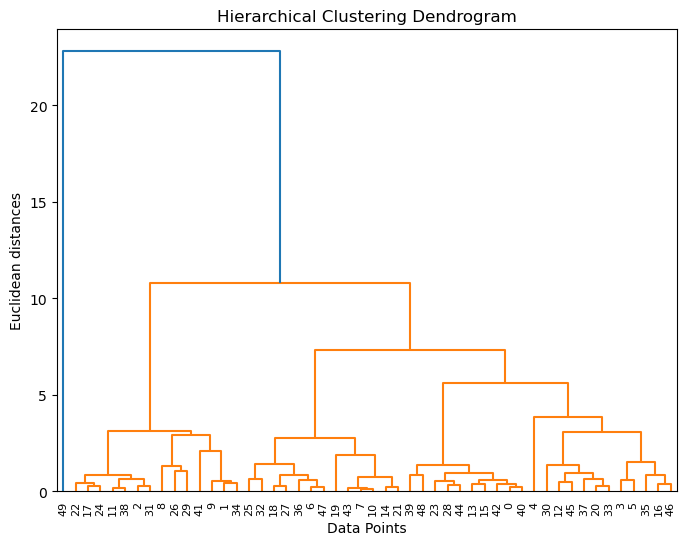

In [65]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean distances")
plt.show()

The dendrogram provides a flexible approach to determining the number of clusters by where you place a horizontal 'cut'. For instance, slicing at the highest vertical line, corresponding to a Euclidean distance of about 20, results in two broad clusters. Conversely, cutting at a lower level, such as a Euclidean distance of 5, yields a greater number of clusters.

Regarding our dataset on uninsured rates, a higher-level clustering could differentiate regions with significant disparities in their changes in uninsured rates. On the other hand, making finer cuts allows for the identification of more subtle variations within the data, revealing intricate patterns that might otherwise be overlooked.

## Conclusion

Taking into account the various clustering techniques and their respective outcomes, it appears that hierarchical clustering yields the most clearly defined clusters, making it a strong candidate for predictive analysis. Despite the clusters not aligning perfectly with the initial labels, this method shows promise for document classification. For instance, a document detailing specific ACA facts and their impact on medical access in the U.S. could be accurately categorized into one of these clusters with a reasonably high probability, facilitating effective classification.